In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (6, 6)

from whatlies import Embedding, Token

Let's make a few wordembedding tokens.

In [69]:
foo = Token("foo", [0.5, 0.1]) 
bar = Token("bar", [0.1, 0.2])
buz = Token("buz", [0.3, 0.3])

We can combine these wordembeddings, you know.

In [70]:
foo | (bar - buz)

Token[(foo | (bar - buz))]

But why read text when we can plot?

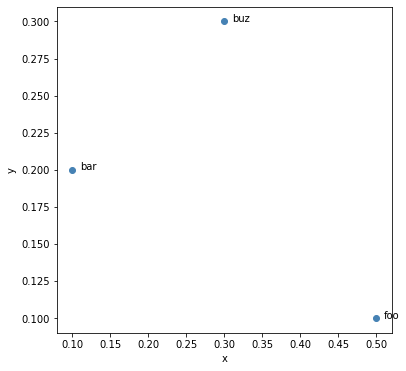

In [71]:
for t in [foo, bar, buz]:
    t.plot(kind="scatter").plot(kind="text");

## Meaning

Let's come up with imaginary embeddings for `man`, `woman`, `king` and `queen`. 

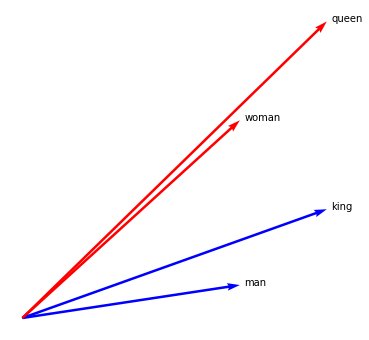

In [78]:
man   = Token("man", [0.5, 0.1])
woman = Token("woman", [0.5, 0.6])
king  = Token("king", [0.7, 0.33])
queen = Token("queen", [0.7, 0.9])

man.plot(kind="arrow", color="blue")
woman.plot(kind="arrow", color="red")
king.plot(kind="arrow", color="blue")
queen.plot(kind="arrow", color="red")
plt.axis('off');

We can confirm the classic approximation that everybody likes to mention.

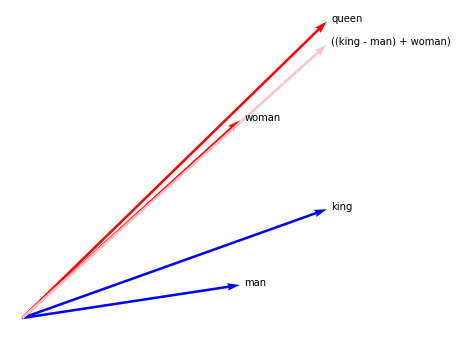

In [79]:
man.plot(kind="arrow", color="blue")
woman.plot(kind="arrow", color="red")
king.plot(kind="arrow", color="blue")
queen.plot(kind="arrow", color="red")

(king - man + woman).plot(kind="arrow", color="pink")

plt.axis('off');

But maybe I am interested in the vector that spans between `queen` and `king`. I'll use the `-` operator here to indicate the connection between the two tokens. 

> Notice the poetry there... 

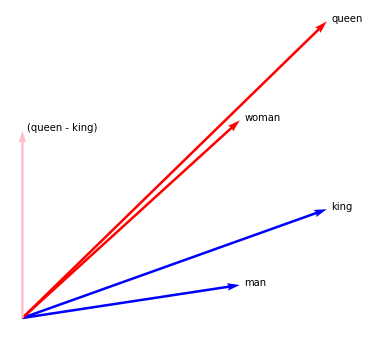

In [80]:
man.plot(kind="arrow", color="blue")
woman.plot(kind="arrow", color="red")
king.plot(kind="arrow", color="blue")
queen.plot(kind="arrow", color="red")
(queen - king).plot(kind="arrow", color="pink")
plt.axis('off');

But that space `queen-king` ... we can also filter all that information out of our words. Linear algebra would call this "making it orthogonal". The `|` operator makes sense here.

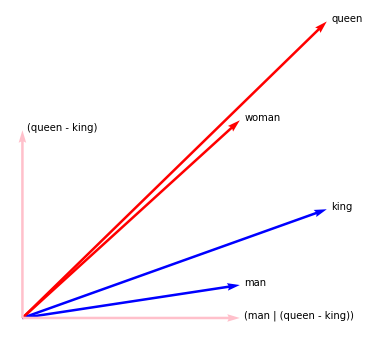

In [104]:
man.plot(kind="arrow", color="blue")
woman.plot(kind="arrow", color="red")
king.plot(kind="arrow", color="blue")
queen.plot(kind="arrow", color="red")

(queen - king).plot(kind="arrow", color="pink")
(man | (queen - king)).plot(kind="arrow", color="pink")
plt.axis('off');

This is interesting. We have our original tokens and can filter away the `(man-woman)` axis. By doing this we get "new" embeddings with different properties. Numerically we can confirm in our example that this new space maps `Token(man)` to be very similar to `Token(woman)`.

In [102]:
(man | (queen - king)).vector, (woman | (queen - king)).vector

(array([0.5, 0. ]), array([5.00000000e-01, 1.11022302e-16]))

Same for `Token(queen)` and `Token(king)` if we filter away the `(man-woman)` axis.

In [103]:
(queen | (man - woman)).vector, (king | (man - woman)).vector

(array([0.7, 0. ]), array([0.7, 0. ]))

But tokens are messy to handle, can't we do this for embeddings in general? 